# **CSST 104 MIDTERM EXAM**
**Jude B. Gajitos**

**BSCS 3B**

# **1.  Data Cleaning and Preparation**

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

register_matplotlib_converters()

In [125]:
google_playstore = pd.read_csv('googleplaystore.csv')
print(google_playstore.isnull().sum()) # Check for Missing Values
print(google_playstore.shape) # Number of Rows and Columns
google_playstore

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [126]:
# Remove Duplicate Data
df = google_playstore.drop_duplicates()

# Fill the null values of the Rating Column with its mean
imputer_num = SimpleImputer(strategy='mean')
df[['Rating']] = imputer_num.fit_transform(df[['Rating']])

# Remove the rows with other null values
df_clean = df.dropna()
# Check again if there is any other missing values
print(df_clean.isnull().sum())
df_clean.shape # Number of Rows and Column

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


<ipython-input-126-923ca83982b0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Rating']] = imputer_num.fit_transform(df[['Rating']])


(10346, 13)

In [127]:
# Converting Specific Categorical Columns into Numerical
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_cols = ['Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating']
encoder = LabelEncoder()
for col in categorical_cols:
    df_clean[col + '_Encoded'] = encoder.fit_transform(df_clean[col])

# Scale numerical features (replace with your numerical features)
scaler = StandardScaler()
numerical_features = ['Rating']  # Replace with your list
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df_clean

<ipython-input-127-3bdfe474a2ec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col + '_Encoded'] = encoder.fit_transform(df_clean[col])
<ipython-input-127-3bdfe474a2ec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col + '_Encoded'] = encoder.fit_transform(df_clean[col])
<ipython-input-127-3bdfe474a2ec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_Encoded,Size_Encoded,Installs_Encoded,Type_Encoded,Price_Encoded,Content Rating_Encoded
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1182,52,6,0,91,1
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5920,26,18,0,91,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5677,362,13,0,91,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1945,96,16,0,91,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,5920,61,9,0,91,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,3469,235,12,0,91,1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,3586,120,8,0,91,1
10838,Parkinson Exercices FR,MEDICAL,4.189542,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,2853,408,2,0,91,1
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,355,456,2,0,91,3


# **2. Exploratory Data Analysis (EDA)**

count    10346.000000
mean         4.188182
std          0.484161
min          1.000000
25%          4.100000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

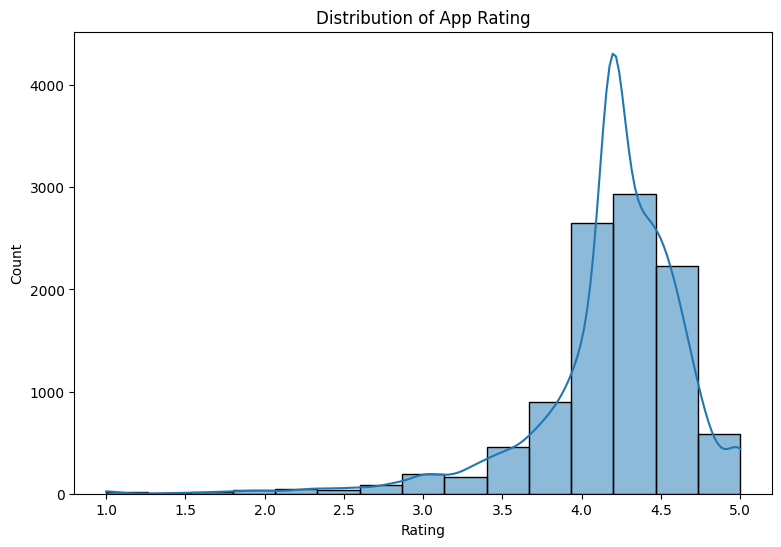

In [128]:
import seaborn as sns
# Data Vizualization for Distribution of App Rating
plt.figure(figsize = (9,6))
sns.histplot(df_clean['Rating'], bins = 15, kde = True)
plt.title("Distribution of App Rating")
# For Descriptive Analysis
df_clean['Rating'].describe()

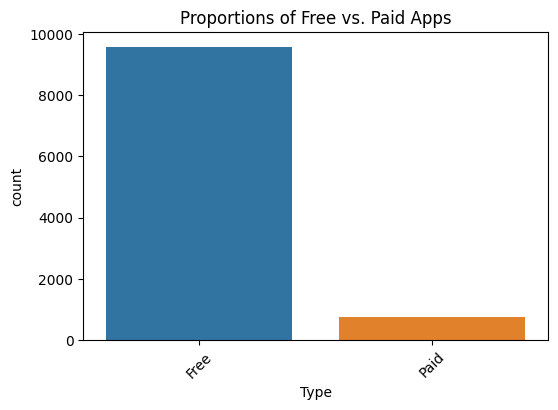

In [129]:
# Data Vizualization of Proportions of Free vs. Paid Apps
plt.figure(figsize=(6, 4))
sns.countplot(x = 'Type', hue = 'Type', data = df_clean)
plt.title('Proportions of Free vs. Paid Apps')
plt.xticks(rotation = 45)
plt.show()

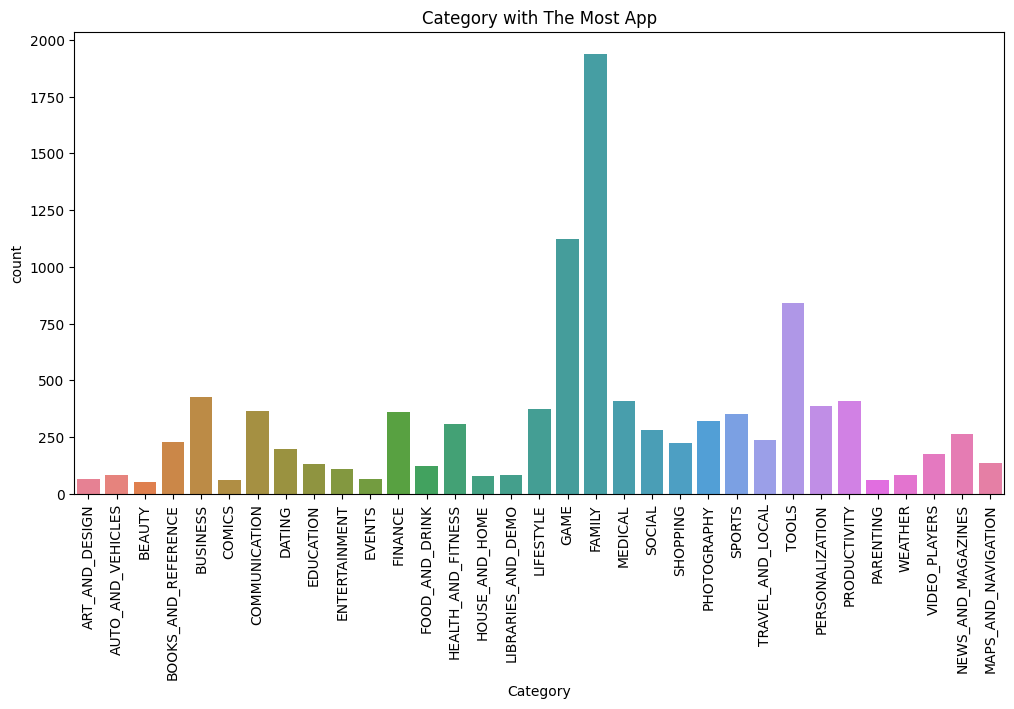

Category
FAMILY                 1939
GAME                   1121
TOOLS                   841
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         386
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     229
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
HOUSE_AND_HOME           80
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

In [130]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Category', hue = 'Category', data = df_clean)
plt.title('Category with The Most App')
plt.xticks(rotation = 90)
plt.show()

df_clean['Category'].value_counts()

# **3. Category Analysis**

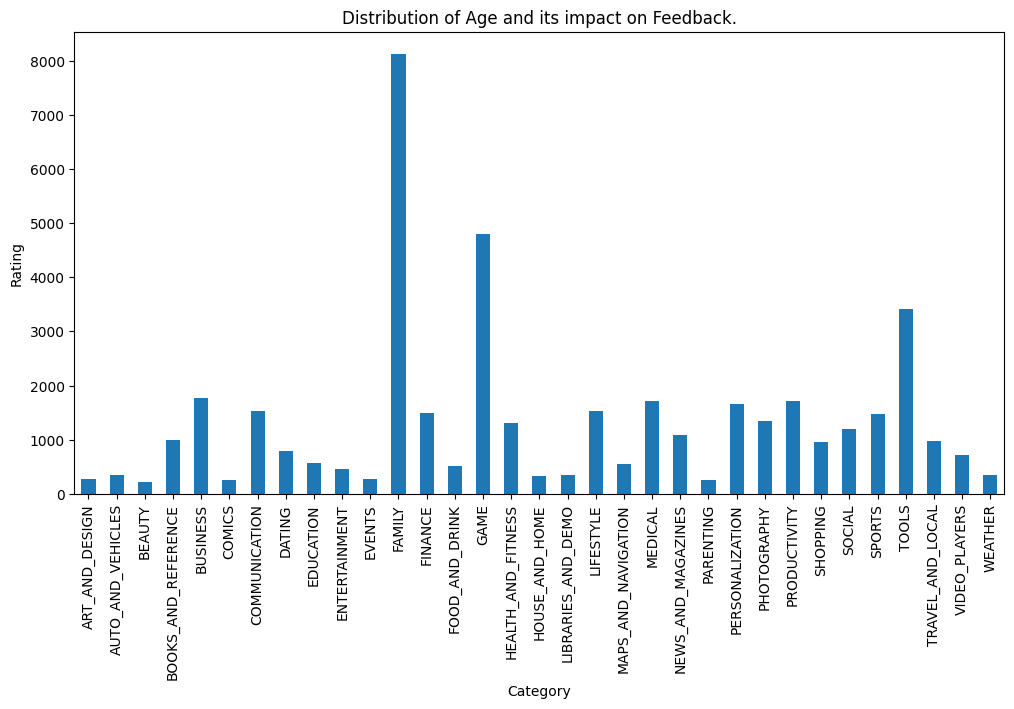

In [131]:
plt.figure(figsize = (12, 6))
cat_rat = df_clean.groupby('Category')['Rating'].sum()
cat_rat.plot(kind = 'bar')
plt.xlabel("Category")
plt.ylabel("Rating")
plt.xticks(rotation = 90)
plt.title("Distribution of Age and its impact on Feedback.")
plt.show()

In [132]:
average_ratings = df_clean.groupby('Category')['Rating'].mean()
# Find the category with the highest average rating
highest_rated_category = average_ratings.idxmax()
highest_average_rating = average_ratings.max()

# Print the results
print(f"The Category with the Highest Average Rating is: {highest_rated_category}")
print(f"The Highest Average Rating for this Category is: {highest_average_rating:.2f}")

category_counts = df_clean.groupby('Category')['Reviews_Encoded'].count()

# Find the category with the most reviews
category_with_most_reviews = category_counts.idxmax()
number_of_reviews = category_counts.max()

# Print the results
print(f"The Category with the Most Reviews is: {category_with_most_reviews}")
print(f"Number of Reviews in this category: {number_of_reviews}")

app_counts = df_clean.groupby('Category')['App'].count()

# Find the category with the most reviews
category_with_most_app = app_counts.idxmax()
number_of_app = app_counts.max()

# Print the results
print(f"The Category with the Most App is: {category_with_most_app}")

The Category with the Highest Average Rating is: EDUCATION
The Highest Average Rating for this Category is: 4.37
The Category with the Most Reviews is: FAMILY
Number of Reviews in this category: 1939
The Category with the Most App is: FAMILY


In [133]:
category_group = df_clean.groupby('Category')

app_size_stats = category_group['Size_Encoded'].describe()
print(app_size_stats)


                      count        mean         std   min     25%    50%  \
Category                                                                   
ART_AND_DESIGN         64.0  159.812500  131.417531   2.0   58.75  119.5   
AUTO_AND_VEHICLES      85.0  189.482353  146.943025   1.0   58.00  147.0   
BEAUTY                 53.0  183.000000  147.899264  21.0   62.00  121.0   
BOOKS_AND_REFERENCE   229.0  207.890830  153.129980   4.0   62.00  168.0   
BUSINESS              427.0  180.103044  147.702288   1.0   57.00  127.0   
COMICS                 60.0  183.400000  148.390826  15.0   59.50  151.0   
COMMUNICATION         366.0  226.948087  172.168904   0.0   60.00  164.0   
DATING                196.0  177.586735  138.697116   2.0   58.75  158.0   
EDUCATION             130.0  219.900000  168.353672   2.0   62.50  204.0   
ENTERTAINMENT         111.0  261.477477  181.161397  18.0   69.00  251.0   
EVENTS                 64.0  167.250000  147.107886   1.0   58.25  118.5   
FAMILY      

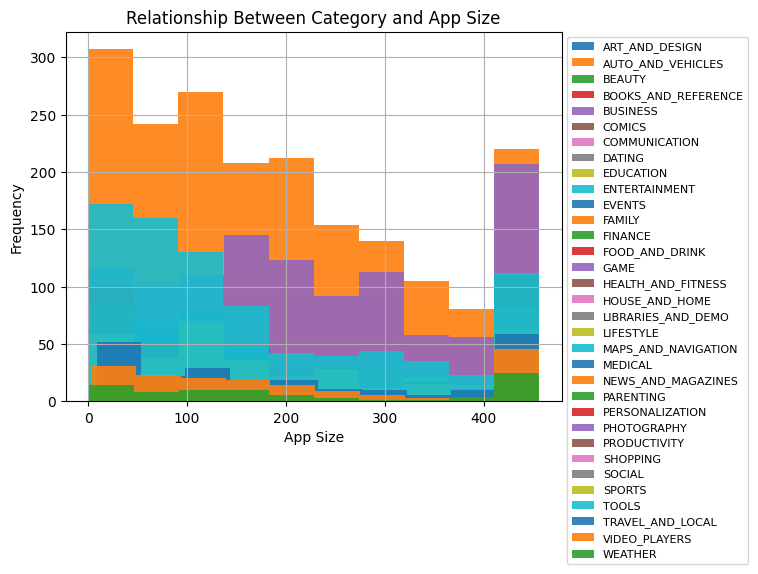

In [134]:
# Relationship Between Category and App Size
for name, group in category_group:
    group['Size_Encoded'].plot.hist(alpha=0.9, label=name)

plt.xlabel('App Size')
plt.ylabel('Frequency')
plt.title('Relationship Between Category and App Size')
plt.legend(fontsize = 8, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

In [135]:
app_price_stats = category_group['Price_Encoded'].describe()
print(app_price_stats)

                      count       mean        std   min   25%   50%   75%  \
Category                                                                    
ART_AND_DESIGN         64.0  87.437500  16.191194  15.0  91.0  91.0  91.0   
AUTO_AND_VEHICLES      85.0  89.094118  12.292684   6.0  91.0  91.0  91.0   
BEAUTY                 53.0  91.000000   0.000000  91.0  91.0  91.0  91.0   
BOOKS_AND_REFERENCE   229.0  86.528384  16.106154   0.0  91.0  91.0  91.0   
BUSINESS              427.0  89.866511   8.127417   0.0  91.0  91.0  91.0   
COMICS                 60.0  91.000000   0.000000  91.0  91.0  91.0  91.0   
COMMUNICATION         366.0  86.311475  18.044123   0.0  91.0  91.0  91.0   
DATING                196.0  89.698980   8.172888   6.0  91.0  91.0  91.0   
EDUCATION             130.0  90.123077   5.217762  57.0  91.0  91.0  91.0   
ENTERTAINMENT         111.0  90.396396   4.998689  41.0  91.0  91.0  91.0   
EVENTS                 64.0  89.859375   9.125000  18.0  91.0  91.0  91.0   

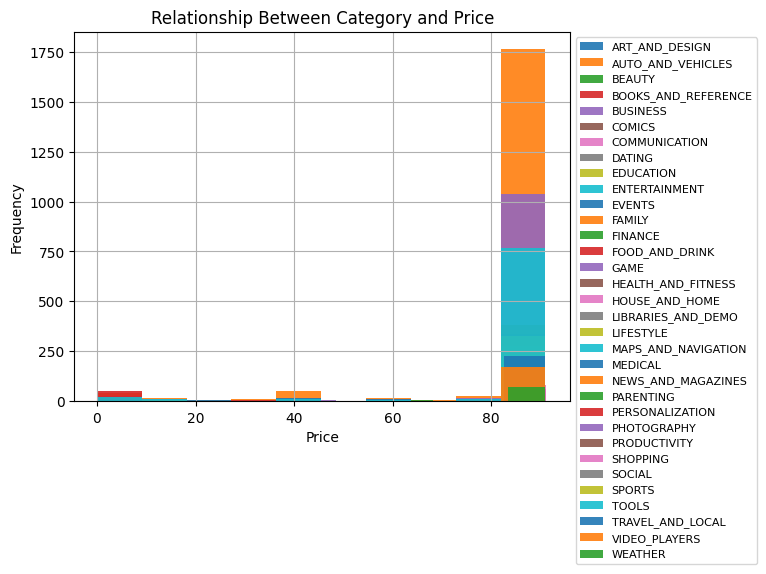

In [136]:
# Relationship Between Category and Price
for name, group in category_group:
    group['Price_Encoded'].plot.hist(alpha=0.9, label=name)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Relationship Between Category and Price')
plt.legend(fontsize = 8, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

# **4. Rating Prediction Model**

In [137]:
# Feature Selection
X = pd.DataFrame(df_clean, columns = ['Reviews_Encoded', 'Size_Encoded', 'Installs_Encoded','Price_Encoded',
                  'Type_Encoded', 'Content Rating_Encoded'])  # Features (independent variables)
y = df_clean['Rating']  # Target variable (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
# Building a Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [139]:
# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.24


# **5. Trend Analysis**

In [140]:
df_clean['Last Updated'] = pd.to_datetime(df_clean['Last Updated'])
df_clean['Year'] = df_clean['Last Updated'].dt.year

<ipython-input-140-8ce1096e5b6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Last Updated'] = pd.to_datetime(df_clean['Last Updated'])
<ipython-input-140-8ce1096e5b6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year'] = df_clean['Last Updated'].dt.year


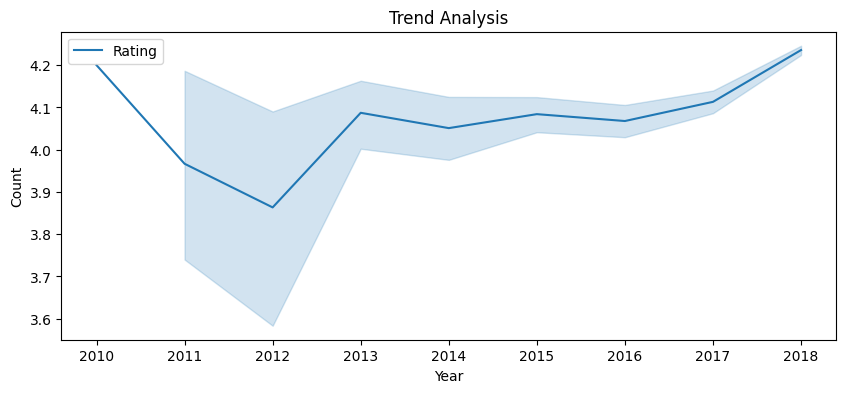

In [141]:
# Trend Analysis of Rating Over Time
plt.figure(figsize=(10, 4))
sns.lineplot(data = df_clean, x = 'Year', y = 'Rating', label = 'Rating')
plt.title('Trend Analysis')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

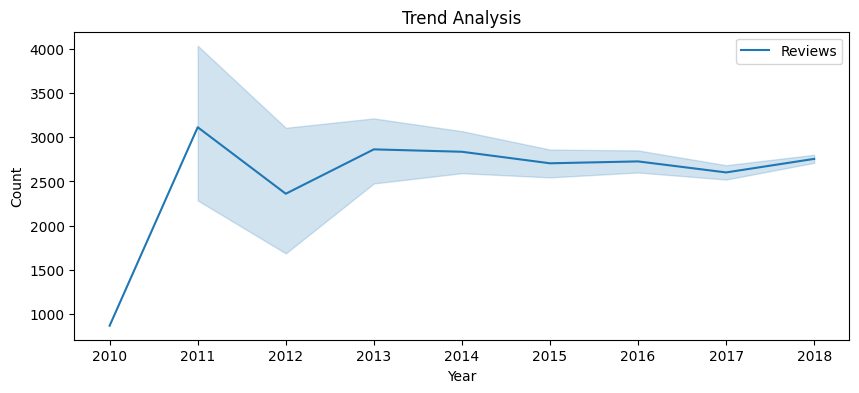

In [142]:
# Trend Analysis of Reviews Over Time
plt.figure(figsize=(10, 4))
sns.lineplot(data = df_clean, x = 'Year', y = 'Reviews_Encoded', label = 'Reviews')
plt.title('Trend Analysis')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

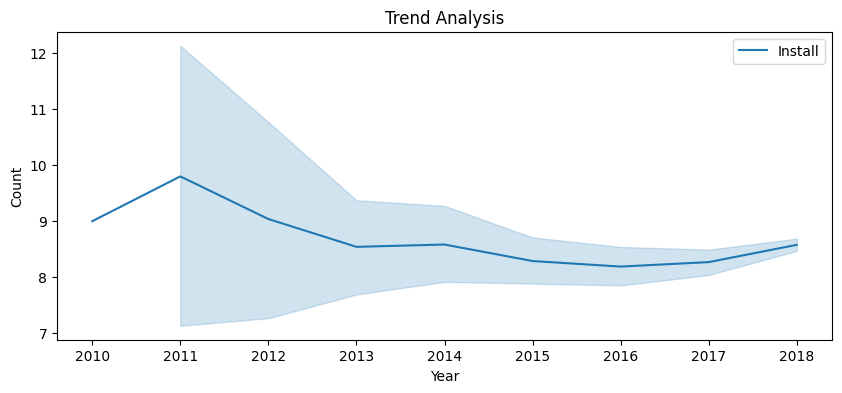

In [143]:
# Trend Analysis of Install Over Time
plt.figure(figsize=(10, 4))
sns.lineplot(data = df_clean, x = 'Year', y = 'Installs_Encoded', label = 'Install')
plt.title('Trend Analysis')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

# **6. Impact of Reviews on Ratings**

In [148]:
# Correlation between the numberof Rating and Reviews
correlation = df_clean['Rating'].corr(df_clean['Reviews_Encoded'])
print("Correlation Coefficient:", correlation)

Correlation Coefficient: -0.005868346513941321


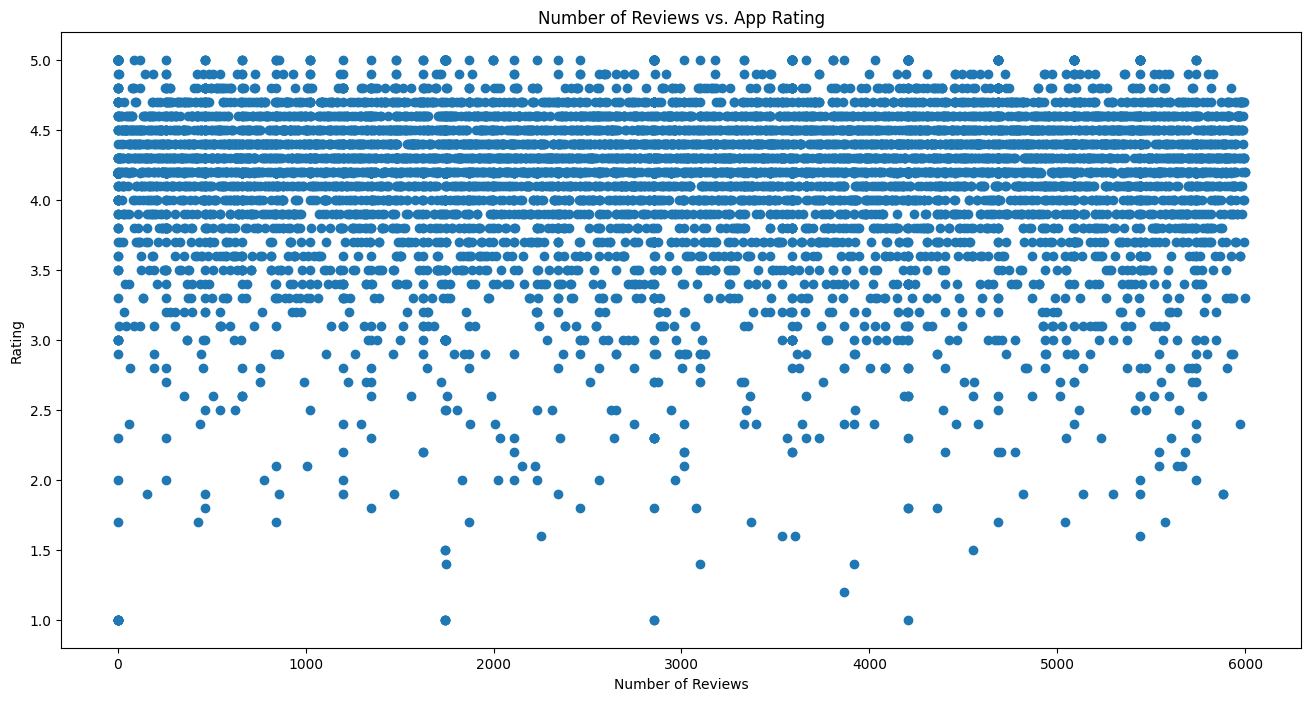

In [149]:
# Scatter Plot of Number of Reviews vs. App Rating
plt.figure(figsize = (16,8))
plt.scatter(df_clean['Reviews_Encoded'], df_clean['Rating'])
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.title('Number of Reviews vs. App Rating')
plt.show()